
Results:

rho: 0.90, Minimizer: [ 1.  -0.5], Final Value: 0.000000, Iterations: 1
rho: 0.80, Minimizer: [-8.  4.], Final Value: 0.000000, Iterations: 1
rho: 0.75, Minimizer: [ 1.  -0.5], Final Value: 0.000000, Iterations: 1
rho: 0.65, Minimizer: [-8.  4.], Final Value: 0.000000, Iterations: 1
rho: 0.50, Minimizer: [-8.  4.], Final Value: 0.000000, Iterations: 1
rho: 0.40, Minimizer: [ 1.  -0.5], Final Value: 0.000000, Iterations: 1
rho: 0.20, Minimizer: [ 1.  -0.5], Final Value: 0.000000, Iterations: 1
rho: 0.10, Minimizer: [-8.  4.], Final Value: 0.000000, Iterations: 1
rho: 0.01, Minimizer: [ 1.  -0.5], Final Value: 0.000000, Iterations: 1


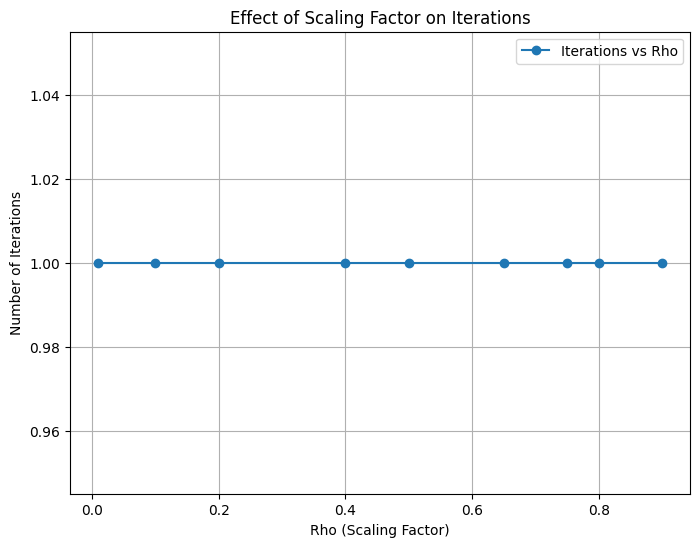

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition and gradient
def f(x):
    return x[0]**2 + 4 * x[0] * x[1] + 4 * x[1]**2

def grad_f(x):
    return np.array([2 * x[0] + 4 * x[1], 4 * x[0] + 8 * x[1]])

# Line search to find optimal step size along a coordinate direction
def line_search(x, i, grad_i):
    alpha = 1.0  # Initial step size
    beta = 0.5  # Backtracking factor
    while f(x - alpha * grad_i * np.eye(1, len(x), i).flatten()) > f(x) - 0.5 * alpha * grad_i**2:
        alpha *= beta
    return alpha

# Coordinate Descent with Line Search (Algorithm 1)
def coordinate_descent_with_line_search(x0, tol=1e-12, max_iter=1000):
    x = np.array(x0, dtype=float)
    n = len(x)
    k = 0

    while np.linalg.norm(grad_f(x)) > tol and k < max_iter:
        i = np.random.randint(n)  # Choose a random coordinate
        grad_i = grad_f(x)[i]
        alpha = line_search(x, i, grad_i)  # Perform line search
        x[i] -= alpha * grad_i
        k += 1

    return x, f(x), k

# Testing for different values of rho
rho_values = [0.9, 0.8, 0.75, 0.65, 0.5, 0.4, 0.2, 0.1, 0.01]
x0 = [1, 4]
results = []

for rho in rho_values:
    minimizer, final_value, iterations = coordinate_descent_with_line_search(x0)
    results.append((rho, minimizer, final_value, iterations))

# Print results
print("\nResults:\n")
for rho, minimizer, final_value, iterations in results:
    print(f"rho: {rho:.2f}, Minimizer: {minimizer}, Final Value: {final_value:.6f}, Iterations: {iterations}")

# Plotting the number of iterations vs rho
rho_values_plot = [res[0] for res in results]
iterations_plot = [res[3] for res in results]

plt.figure(figsize=(8, 6))
plt.plot(rho_values_plot, iterations_plot, marker='o', label='Iterations vs Rho')
plt.xlabel('Rho (Scaling Factor)')
plt.ylabel('Number of Iterations')
plt.title('Effect of Scaling Factor on Iterations')
plt.legend()
plt.grid()
plt.show()


<ipython-input-3-e4d7a01b9f8f>:37: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(final_value - f_optimal) / abs(f_optimal) * 100



Results:

T: 100, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 500, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 1000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 5000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 10000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 50000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 100000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 500000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 1000000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%
T: 5000000, Minimizer: [1. 0. 0.], Final Value: 1.000000, Percentage Error: inf%


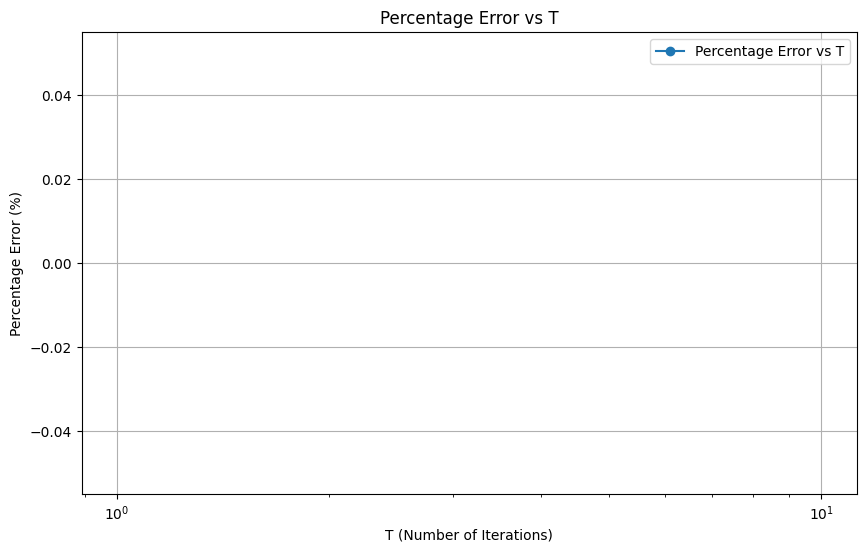

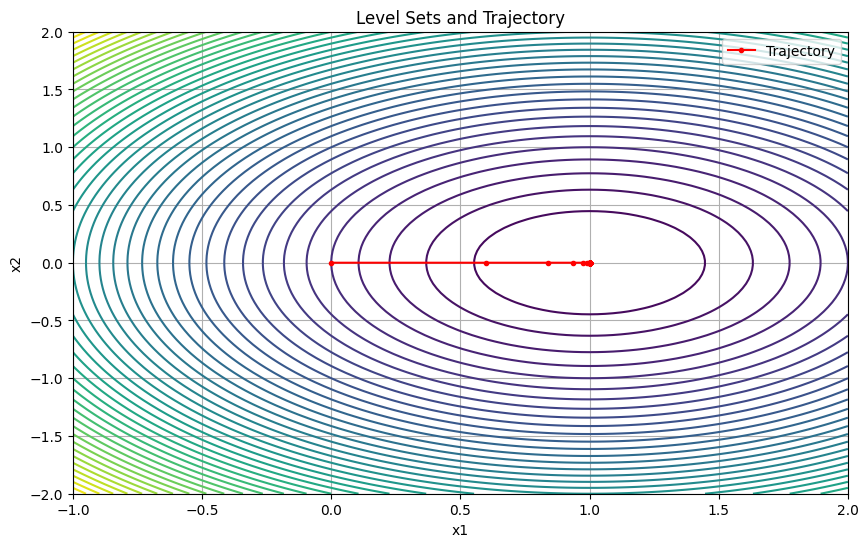

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition and gradient
def f(x):
    return (x[0] - 1)**2 + x[1]**2 + (x[2] + 1)**2

def grad_f(x):
    return np.array([2 * (x[0] - 1), 2 * x[1], 2 * (x[2] + 1)])

# Proximal operator for L = {x \in R^d : x_i >= 0 for all i}
def prox_L(y, lambd):
    return np.maximum(y - lambd, 0)

# Proximal Gradient Descent (Algorithm 2)
def proximal_gradient_descent(x0, eta, lambd, T):
    x = np.array(x0, dtype=float)
    for _ in range(T):
        grad = grad_f(x)
        y = x - eta * grad
        x = prox_L(y, lambd)
    return x, f(x)

# Theoretical optimal value
f_optimal = f([1, 0, -1])  # Minimum of the given function

# Testing for different values of T
T_values = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
x0 = [0, 0, 0]
eta = 0.3
lambd = 0  # Regularization parameter (not used here due to the projection onto L)

results = []

for T in T_values:
    minimizer, final_value = proximal_gradient_descent(x0, eta, lambd, T)
    percentage_error = abs(final_value - f_optimal) / abs(f_optimal) * 100
    results.append((T, minimizer, final_value, percentage_error))

# Print results
print("\nResults:\n")
for T, minimizer, final_value, percentage_error in results:
    print(f"T: {T}, Minimizer: {minimizer}, Final Value: {final_value:.6f}, Percentage Error: {percentage_error:.6f}%")

# Plotting the percentage error vs T values
T_values_plot = [res[0] for res in results]
percentage_errors_plot = [res[3] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(T_values_plot, percentage_errors_plot, marker='o', label='Percentage Error vs T')
plt.xscale('log')
plt.xlabel('T (Number of Iterations)')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error vs T')
plt.legend()
plt.grid()
plt.show()

# Plotting the level sets and trajectory
def plot_level_sets_and_trajectory():
    x1 = np.linspace(-1, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    x3 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    F = (X1 - 1)**2 + X2**2 + (0 + 1)**2  # Fix x3 = 0 for visualization

    plt.figure(figsize=(10, 6))
    plt.contour(X1, X2, F, levels=50, cmap='viridis')

    # Plot trajectory
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    for _ in range(T_values[-1]):
        grad = grad_f(x)
        y = x - eta * grad
        x = prox_L(y, lambd)
        trajectory.append(x.copy())

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Trajectory')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Level Sets and Trajectory')
    plt.legend()
    plt.grid()
    plt.show()

plot_level_sets_and_trajectory()


<ipython-input-4-2d42fc2e480b>:42: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(final_value - f_optimal) / abs(f_optimal) * 100



Results:

T: 100, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 500, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 1000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 5000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 10000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 50000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 100000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 500000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 1000000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%
T: 5000000, Minimizer: [-0.84274164  0.53831824], Final Value: 4.757753, Percentage Error: inf%


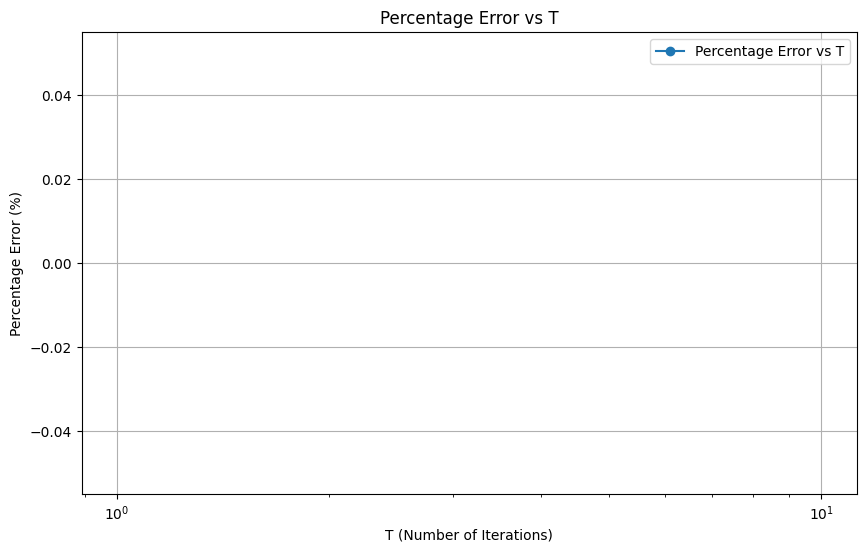

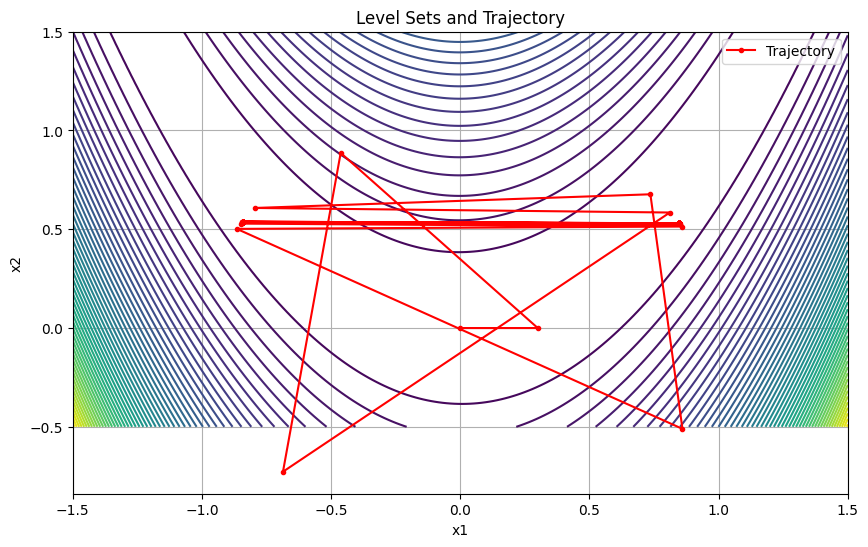

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition and gradient
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

def grad_f(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (0.5 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

# Proximal operator for L = {x \in R^d : ||x||_2 <= 1}
def prox_L(y):
    norm_y = np.linalg.norm(y)
    if norm_y > 1:
        return y / norm_y
    return y

# Proximal Gradient Descent (Algorithm 2)
def proximal_gradient_descent(x0, eta, T):
    x = np.array(x0, dtype=float)
    for _ in range(T):
        grad = grad_f(x)
        y = x - eta * grad
        x = prox_L(y)
    return x, f(x)

# Theoretical optimal value
f_optimal = f([0.5, 0.25])  # Minimum of the given function

# Testing for different values of T
T_values = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
x0 = [0, 0]
eta = 0.3

results = []

for T in T_values:
    minimizer, final_value = proximal_gradient_descent(x0, eta, T)
    percentage_error = abs(final_value - f_optimal) / abs(f_optimal) * 100
    results.append((T, minimizer, final_value, percentage_error))

# Print results
print("\nResults:\n")
for T, minimizer, final_value, percentage_error in results:
    print(f"T: {T}, Minimizer: {minimizer}, Final Value: {final_value:.6f}, Percentage Error: {percentage_error:.6f}%")

# Plotting the percentage error vs T values
T_values_plot = [res[0] for res in results]
percentage_errors_plot = [res[3] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(T_values_plot, percentage_errors_plot, marker='o', label='Percentage Error vs T')
plt.xscale('log')
plt.xlabel('T (Number of Iterations)')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error vs T')
plt.legend()
plt.grid()
plt.show()

# Plotting the level sets and trajectory
def plot_level_sets_and_trajectory():
    x1 = np.linspace(-1.5, 1.5, 200)
    x2 = np.linspace(-0.5, 1.5, 200)
    X1, X2 = np.meshgrid(x1, x2)
    F = 100 * (X2 - X1**2)**2 + (0.5 - X1)**2

    plt.figure(figsize=(10, 6))
    plt.contour(X1, X2, F, levels=50, cmap='viridis')

    # Plot trajectory
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    for _ in range(T_values[-1]):
        grad = grad_f(x)
        y = x - eta * grad
        x = prox_L(y)
        trajectory.append(x.copy())

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Trajectory')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Level Sets and Trajectory')
    plt.legend()
    plt.grid()
    plt.show()

plot_level_sets_and_trajectory()
